In [1]:
import pandas as pd

In [2]:
weather=pd.read_csv("GlobalLandTemperaturesByCity.csv",index_col="dt")

In [3]:
weather

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...
2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E


In [4]:
weather.apply(pd.isnull).sum()/weather.shape[0]

AverageTemperature               0.042345
AverageTemperatureUncertainty    0.042345
City                             0.000000
Country                          0.000000
Latitude                         0.000000
Longitude                        0.000000
dtype: float64

In [5]:
weather[pd.isnull(weather["AverageTemperature"])]

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
1744-08-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...
1752-06-01,NaN,NaN,Zwolle,Netherlands,52.24N,5.26E
1752-07-01,NaN,NaN,Zwolle,Netherlands,52.24N,5.26E
1752-08-01,NaN,NaN,Zwolle,Netherlands,52.24N,5.26E


In [6]:
weather=weather.fillna(method="ffill")

C:\Users\rishi\AppData\Local\Temp\ipykernel_5164\1723356616.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather=weather.fillna(method="ffill")


In [7]:
weather[pd.isnull(weather["AverageTemperature"])]

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,


In [8]:
weather.index=pd.to_datetime(weather.index)

<Axes: xlabel='dt'>

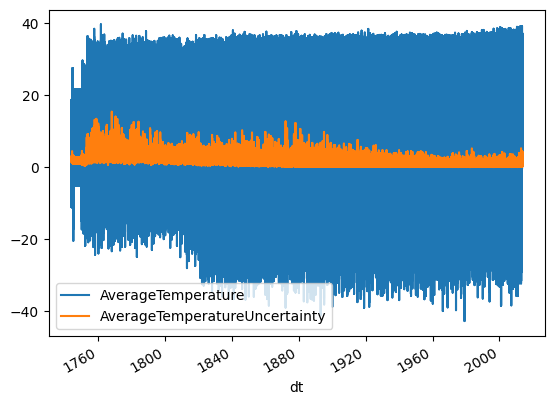

In [9]:
weather[["AverageTemperature","AverageTemperatureUncertainty"]].plot()

In [10]:
weather.groupby(weather.index.year).mean()

TypeError: agg function failed [how->mean,dtype->object]

In [12]:
weather["target"]=weather.shift(-1)["AverageTemperature"]

In [13]:
weather

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,target
dt,,,,,,,
1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,6.068
1743-12-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,6.068
1744-01-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,6.068
1744-02-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,6.068
1744-03-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,5.788
...,...,...,...,...,...,...,...
2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E,15.043
2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E,18.775
2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E,18.025


In [14]:
weather=weather.iloc[:-1].copy()

In [15]:
weather

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,target
dt,,,,,,,
1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,6.068
1743-12-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,6.068
1744-01-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,6.068
1744-02-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,6.068
1744-03-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,5.788
...,...,...,...,...,...,...,...
2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E,11.464
2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E,15.043
2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E,18.775


In [17]:
from sklearn.linear_model import Ridge
reg=Ridge(alpha=.1)

In [40]:
pred=["AverageTemperature","AverageTemperatureUncertainty"]

In [41]:
tr=weather.sort_index().loc[:"2010-12-01"]

In [42]:
ts=weather.sort_index().loc["2011-01-01":]

In [43]:
reg.fit(tr[pred],tr["target"])

Ridge(alpha=0.1)

In [44]:
prd=reg.predict(ts[pred])

In [45]:
from sklearn.metrics import mean_absolute_error

In [46]:
mean_absolute_error(ts["target"],prd)

2.8971826664822795

In [54]:
final=pd.concat([ts["target"],pd.Series(prd,index=ts.index)],axis=1)
final.columns=["actual","prediction"]

In [55]:
final

,actual,prediction
dt,,
2011-01-01,-18.138,-17.737690
2011-01-01,14.372,11.189412
2011-01-01,7.422,2.065216
2011-01-01,-5.149,-5.205821
2011-01-01,12.449,14.920954
...,...,...
2013-09-01,13.344,24.760721
2013-09-01,21.316,29.099393
2013-09-01,2.377,29.721784


In [58]:
reg.coef_

array([ 0.93358775, -0.00557503])